<a href="https://colab.research.google.com/github/imabhi1216/Enron-Email-Classification/blob/main/FINAL_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task Build an AI model to classify emails into different categories based on the content of the emails
Build an AI model to classify emails into different categories based on
the
content of the emails

a) Company Business, Strategy, etc. (elaborate in Section 3 [Topics])

b) Purely Personal

c) Personal but in professional context (e.g., it was good working with
you)

d) Logistic Arrangements (meeting scheduling, technical support, etc)

e) Employment arrangements (job seeking, hiring, recommendations,
etc)

f) Document editing/checking (collaboration)

## Import Important Libraries

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 12.4 MB/s eta 0:00:00


In [ ]:
!pip install textaugment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 6.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=32a01fda62a2b0f8ef69d52b75663898ea0efd25ae9b6268f805d558766827a5
  Stored in directory: /root/.cache/pip/wheels/0e/ce/9b/d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
   

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
import contractions
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
import gensim
from textaugment import EDA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from numpy import loadtxt
from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Read the csv file 


The csv file was generated using data cleaning such as removing all the headers, footers, attahments,and other unneccesary details from the text file adn then it was converted to csv file

In [ ]:
df = pd.read_csv('out_new.csv')
df['Text'] = df['Text'].astype(str)

### Find the unique number of Classes

In [ ]:
df['Folder Name'].unique()

array([1, 2, 3, 4, 5, 6])

In [ ]:
print(df.shape)
df.head()

(1663, 3)


,File Name,Text,Folder Name
0,10425.txt,", , -- -- -- -- -- -- -- -- -- -- -- Forwarded...",1
1,106296.txt,"Bcc : , , In anticipation of potential litigat...",1
2,106298.txt,Bcc : Julia and Steve -- here are some questio...,1
3,106588.txt,Bcc : Julia and Steve -- here are some questio...,1
4,106590.txt,"Bcc : , , In anticipation of potential litigat...",1


### Renaming the column names and dropping the File Name columns as it's of no use for the classification task

In [ ]:
df = df.rename(columns={'Folder Name': 'label'})
df = df.rename(columns={'Text': 'text'})
df = df.drop(['File Name'], axis=1)

### Find if any duplicates are present in the dataset

In [ ]:
print("length of Data Frame :" ,len(df))
df = df.drop_duplicates()
print("length of Data Frame after dropping duplicates :" ,len(df))

length of Data Frame : 1663
length of Data Frame after dropping duplicates : 1585


### Plotting the frequency of each classes in the dataset




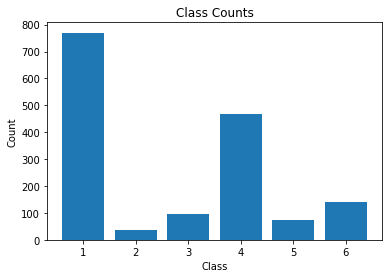

In [ ]:
# Count number of occurrences of each unique class in the label column
class_counts = df['label'].value_counts()

# Plot bar chart of class counts
plt.bar(class_counts.index, class_counts.values)
plt.title("Class Counts")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### As can be seen from the above the plot that the data is highly imbalanced 

In [ ]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(df.shape)


df['label'].value_counts()

(1585, 2)


1    770
4    468
6    141
3     97
5     74
2     35
Name: label, dtype: int64

### Get acquainted with the data


Print few random text to undertand the data and get the idea of what all processing is needed

In [ ]:
# printing some random emails
sent_0 = df['text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = df['text'].values[1000]
print(sent_1000)
print("="*50)

sent_1200 = df['text'].values[1200]
print(sent_1200)
print("="*50)

sent_1550= df['text'].values[1550]
print(sent_1550)
print("="*50)

, , -- -- -- -- -- -- -- -- -- -- -- Forwarded by Steven J Kean/HOU/EES on 10/18/99 08:46 AM -- -- -- -- -- -- -- -- -- -- -- -- -- - Karen Denne @ ENRON 10/18/99 07:08 AM cc : -- -- -- -- -- -- -- -- -- -- -- Forwarded by Karen Denne/Corp/Enron on 10/18/99 07:07 AM -- -- -- -- -- -- -- -- -- -- -- -- -- - Andrew Morrison @ ECT 10/18/99 03:43 AM cc : Iona Maclean/LON/ECT @ ECT Karen Here it is ! Plenty of good Houston input here as well as Europe . An excellent general article has resulted ; nice pictures too . I 'll get some original copies couriered over to you asap . We are organising bi-lingual reprints . Please let Iona know how many you 'd like . Thanks Andrew -- -- -- -- -- -- -- -- -- -- -- Forwarded by Andrew Morrison/LON/ECT on 10/18/99 09:43 AM -- -- -- -- -- -- -- -- -- -- -- -- -- - Enron Capital & Trade Resources Corp. From : GLS < > 10/15/99 09:49 AM cc : - ENRON.DOC
With Rick , Mark , Lou , and possibly Hillings
At the bottom of the string is Stacy 's phone number -- --

##### As can be seen above that dates, numbers, punctutaion, tags, email ids, websites are present in the dataset which adds no valuable information for classification so thye best things is to remove all those unneccesary stuff

In [ ]:
#remove words with numbers python:
sent_1200 = re.sub("\S*\d\S*", "", sent_1200).strip()
print(sent_1200)

At the bottom of the string is Stacy 's phone number -- -- - Forwarded by Steven J Kean/NA/Enron on   AM -- -- - Mark Courtney @ EES   AM To : Brad Alford/NA/Enron @ ENRON cc : Lexi Elliott/NA/Enron @ Enron , Steven J Kean/NA/Enron @ Enron , Jacqueline Coleman/NA/Enron @ ENRON Subject : Re : I managed to contact Sean this morning . He also confirmed dinner at Brennan 's . He did n't really have a reason for waiting except to see what other offers came in . He 's shopping us . He did say he was leaning toward Enron , though . I answered some questions he had concerning what his day to day duties might consist of and how much input he would have in his summer placement . I also suggested he get in touch with Morela and talk to her about her summer experience . Mark Brad Alford @ ENRON   AM cc : Steven J Kean/NA/Enron @ Enron , Mark Courtney/HOU/EES @ EES , Jacqueline Coleman/NA/Enron @ ENRON I spoke with Philip today and he is confirmed for dinner at Brennan 's . He is holding back on co

In [ ]:
#remove special character
sent_1200 = re.sub('[^A-Za-z0-9]+', ' ', sent_1200)
print(sent_1200)

At the bottom of the string is Stacy s phone number Forwarded by Steven J Kean NA Enron on AM Mark Courtney EES AM To Brad Alford NA Enron ENRON cc Lexi Elliott NA Enron Enron Steven J Kean NA Enron Enron Jacqueline Coleman NA Enron ENRON Subject Re I managed to contact Sean this morning He also confirmed dinner at Brennan s He did n t really have a reason for waiting except to see what other offers came in He s shopping us He did say he was leaning toward Enron though I answered some questions he had concerning what his day to day duties might consist of and how much input he would have in his summer placement I also suggested he get in touch with Morela and talk to her about her summer experience Mark Brad Alford ENRON AM cc Steven J Kean NA Enron Enron Mark Courtney HOU EES EES Jacqueline Coleman NA Enron ENRON I spoke with Philip today and he is confirmed for dinner at Brennan s He is holding back on commiting to Enron mainly to preserve his geographic options He indicated that Enr

 The preprocess_text function takes a text string argument. The purpose of this function is to preprocess the input text by performing various operations, such as removing HTML tags, removing URLs, expanding contractions, removing punctuation, removing stop words, and lemmatizing the words.

In [ ]:
from textblob import TextBlob

def spelling_correction(text):
    blob = TextBlob(text)
    corrected_text = str(blob.correct())
    return corrected_text


In [ ]:
from dateutil.parser import parse
  
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Define a regular expression pattern to match words that are 2 or fewer characters long
    pattern1 = r'\b\w{1,2}\b'

    # Define a regular expression pattern to match words that contain repeated letters
    pattern2 = r'\b\w*(\w)\1+\w*\b'

#    # Replace dates with "date" string
    # dates = re.findall(r'\d{1,2}[/-]\d{1,2}[/-]\d{2,4}', text)
    # for date in dates:
    #     try:
    #         parsed_date = parse(date)
    #         text = text.replace(date, 'date')
    #     except:
    #         pass

    # Replace times with "time" string
    # times = re.findall(r'\d{1,2}:\d{2}(:\d{2})?\s?(AM|PM)?', text)
    # for time in times:
    #     text = text.replace(time[0], 'time')

    # Define a regular expression pattern to match words that are 2 or fewer characters long
    pattern1 = r'\b\w{1,2}\b'

    # Define a regular expression pattern to match words that contain repeated letters
    pattern2 = r'\b\w*(\w)\1+\w*\b'

    # Expand contractions
    text = contractions.fix(text)

    # Remove websites
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www.\S+', '', text)

    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())

    # Remove "bcc" string
    text = text.replace('bcc', '')
    text = text.replace('forwarded', '')
    text = text.replace('to:', '')
    

    # Remove words that are 2 or fewer characters long
    text = re.sub(pattern1, '', text)

    # Remove words that contain repeated letters
    text = re.sub(pattern2, '', text)

    # Remove digits
    text = text.translate(str.maketrans('', '', string.digits))

    # Remove non-letter characters and extra whitespaces
    text = re.sub('[^A-Za-z]+', ' ', text).strip()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text


# Apply preprocess_text function to text column in DataFrame
df['text'] = df['text'].apply(preprocess_text)

In [ ]:
sent_0 = df['text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = df['text'].values[1000]
print(sent_1000)
print("="*50)

sent_1200 = df['text'].values[1200]
print(sent_1200)
print("="*50)

sent_1550= df['text'].values[1550]
print(sent_1550)
print("="*50)

forwarded steven karen enron forwarded karen andrew ect iona macleanlonect ect karen here plenty houston input here europe general article ha resulted nice picture get some original copy couriered over you are organising bilingual reprint please let iona know how many you would like thanks andrew forwarded andrew enron capital trade resource corp from gls enrondoc
with rick mark lou and
the the string stacy phone number forwarded steven mark courtney brad alfordnaenron enron lexi enron steven enron jacqueline enron subject managed contact sean this morning also confirmed did have reason for waiting except what other came did say wa leaning toward enron though answered some question had concerning what his day day duty might consist and how much input would have his placement also get touch with morela and talk her about her experience mark brad alford enron steven enron mark jacqueline enron spoke with philip today and confirmed for holding back enron mainly preserve his geographic opt

### Data Augmentation



Source https://github.com/dsfsi/textaugment

In [ ]:
pip install textaugment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textaugment import EDA
# Import the EDA class
# from eda import EDA

# Define functions for random swapping and random deletion using the EDA class
def random_swaping(text):
    t = EDA()
    return t.random_swap(text) if text else ""

def random_deletion(text):
    t = EDA()
    return t.random_deletion(text, p=0.5) if text else ""


for i in [2,3,5,6]:
    df_2 = df[df["label"]==i]["text"]
    # df_2_syn = df_2.apply(synonym_replace)
    # df_2_swap = df_2.apply(random_swaping)
    df_2_delet = df_2.apply(random_deletion)
    result = pd.concat([df_2_delet]).to_frame()
    result['label'] = i
    df = pd.concat([df,result])
    
  
df["text"] = df["text"].astype('str')

In [ ]:
# type(df["text"])

In [ ]:
for i in [2,3,5,6]:
    df_2 = df[df["label"]==i]["text"]
    # df_2_syn = df_2.apply(synonym_replace)
    df_2_swap = df_2.apply(random_swaping)
    # df_2_delet = df_2.apply(random_deletion)
    result = pd.concat([df_2_swap]).to_frame()
    result['label'] = i
    df = pd.concat([df,result]) 
    
df["text"] = df["text"].astype('str')

In [ ]:
from googletrans import Translator
import random
import time
import requests
pattern = r'class="t0">(?P<text>.+?)<'
def back_translation(text):
    # Translate the text to a random language
    lang1 = random.choice(["de", "es", "fr", "it", "nl", "pt"])
    url = f"https://translate.google.com/m?hl=en&sl=en&tl={lang1}&ie=UTF-8&prev=_m&q={text}"
    response1 = requests.get(url)
    try:
        text_translated1 = re.search(pattern, response1.text).group('text')
        time.sleep(1)

    # Translate the translated text back to English
        url = f"https://translate.google.com/m?hl=en&sl={lang1}&tl=en&ie=UTF-8&prev=_m&q={text_translated1}"
        response2 = requests.get(url)
        text_translated2 = re.search(pattern, response2.text).group('text')

        return text_translated2
    except:
        return text

    # Add a delay to avoid hitting the rate limit of the translation API
    


In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
for i in [2,5]:
    df_2 = df[df["label"]==i]["text"]
    # df_2_syn = df_2.apply(synonym_replace)
    df_2_back_translation = df_2.apply(back_translation)
    # df_2_delet = df_2.apply(random_deletion)
    result = pd.concat([df_2_back_translation]).to_frame()
    result['label'] = i
    df = pd.concat([df,result]) 
    
df["text"] = df["text"].astype('str')

In [ ]:
df.head()

,text,label
0,forwarded steven karen enron forwarded karen a...,1
1,anticipation potential litigation involving op...,1
2,julia and steve here are some question sent th...,1
5,enron wholesale service the chairman greg pres...,1
7,head this not advance out side enron but you g...,1


In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

In [ ]:
df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
df.head()

,text,label
0,forwarded steven karen enron forwarded karen a...,1
1,anticipation potential litigation involving op...,1
2,julia steve question sent cal border line pack...,1
5,enron wholesale service chairman greg presiden...,1
7,head advance side enron guy know way helpful c...,1


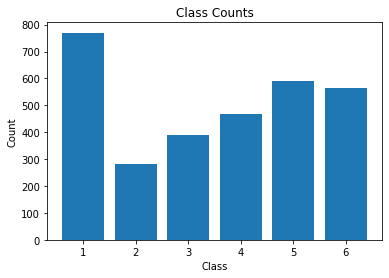

In [ ]:
class_counts = df['label'].value_counts()

# Plot bar chart of class counts
plt.bar(class_counts.index, class_counts.values)
plt.title("Class Counts")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
df["text"].isnull().sum()

0

In [ ]:
print("length of Data Frame :" ,len(df))
df = df.drop_duplicates()
print("length of Data Frame after dropping duplicates :" ,len(df))

length of Data Frame : 3062
length of Data Frame after dropping duplicates : 2504


### Feature Engineering


 
__total number of characters in the text__

__total number of words__

__total number of unique words__

__Lexical diversity = total number of words / number of unique words__

__Word average length = number of characters / number of words__

In [ ]:
from textblob import TextBlob
emails = df['text'].tolist()

# Define a function to compute the sentiment polarity of each email
def get_sentiment(email):
    blob = TextBlob(email)
    return blob.sentiment.polarity

# Compute the sentiment polarity for each email
sentiment_scores = [get_sentiment(email) for email in emails]

# Add the sentiment scores as a new column in the DataFrame
df['sentiment'] = sentiment_scores

# Print the first 10 rows of the DataFrame, including the sentiment scores
print(df.head(10))

                                                 text  label  sentiment
0   forwarded steven karen enron forwarded karen a...      1   0.345000
1   anticipation potential litigation involving op...      1   0.034848
2   julia steve question sent cal border line pack...      1   0.066850
5   enron wholesale service chairman greg presiden...      1   0.196742
7   head advance side enron guy know way helpful c...      1   0.103030
8   fyi jds forwarded james energy james welcome u...      1   0.109449
9   michael like sponsorship dasovich enron think ...      1   0.280952
10  though somewhat notion raised idea cosponsorsh...      1   0.145368
11  described problem solution california generati...      1   0.283333
12  speaking national club next give overview enro...      1   0.000000


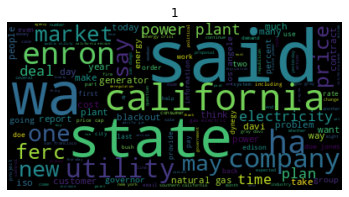

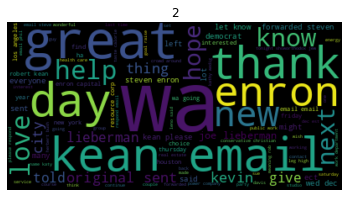

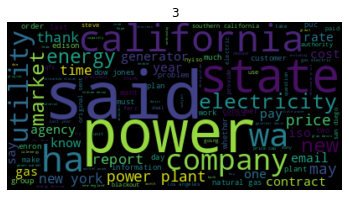

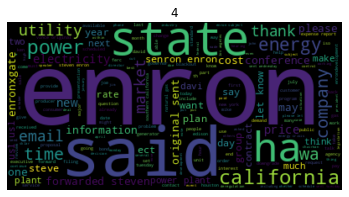

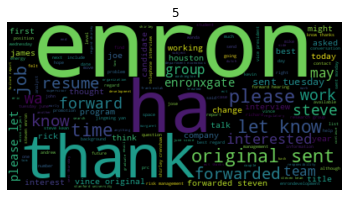

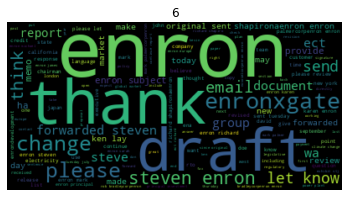

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordclouds(df):
    # Iterate through each class in the dataset
    for label in df['label'].unique():
        # Get all documents in the current class
        class_docs = df[df['label'] == label]['text']
        # Combine all documents into a single string
        class_text = ' '.join(class_docs)
        # Generate a word cloud for the current class
        wordcloud = WordCloud().generate(class_text)
        # Plot the word cloud for the current class
        plt.figure()
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(label)
        plt.show()


create_wordclouds(df)

In [ ]:
from nltk.tokenize import word_tokenize

# Load the text classification dataset from a CSV file
# df = pd.read_csv('text_classification.csv')

# Tokenize the text in each document
df['tokens'] = df['text'].apply(word_tokenize)

# Count the frequency of each word in each document
df['money_freq'] = df['tokens'].apply(lambda x: x.count('money'))
df['credit_freq'] = df['tokens'].apply(lambda x: x.count('credit'))
df['business_freq'] = df['tokens'].apply(lambda x: x.count('business'))
df['addresses_freq'] = df['tokens'].apply(lambda x: x.count('addresses'))
df['people_freq'] = df['tokens'].apply(lambda x: x.count('people'))

df['document_freq'] = df['tokens'].apply(lambda x: x.count('document'))
df['time_freq'] = df['tokens'].apply(lambda x: x.count('time'))
df['please_freq'] = df['tokens'].apply(lambda x: x.count('please'))
df['resume_freq'] = df['tokens'].apply(lambda x: x.count('resume'))
df['interested_freq'] = df['tokens'].apply(lambda x: x.count('interested'))

df['electricity_freq'] = df['tokens'].apply(lambda x: x.count('electricity'))
df['utility_freq'] = df['tokens'].apply(lambda x: x.count('utility'))
df['power_freq'] = df['tokens'].apply(lambda x: x.count('power'))
df['market_freq'] = df['tokens'].apply(lambda x: x.count('market'))
df['energy_freq'] = df['tokens'].apply(lambda x: x.count('energy'))

df['contract_freq'] = df['tokens'].apply(lambda x: x.count('contract'))
df['great_freq'] = df['tokens'].apply(lambda x: x.count('great'))
df['love_freq'] = df['tokens'].apply(lambda x: x.count('love'))
df['hate_freq'] = df['tokens'].apply(lambda x: x.count('hate'))
df['problem_freq'] = df['tokens'].apply(lambda x: x.count('problem'))

In [ ]:
# No. of Characters
df["num_char"]=df["text"].str.len()

# No of words
from nltk.tokenize import word_tokenize
df["num_words"]=df["text"].apply(word_tokenize).apply(len)

# No. of unique words
df['num_vocab'] = df['text'].apply(word_tokenize).apply(set).apply(len)

# Lexical diversity
df['lexical_div'] = df['num_words'] / df['num_vocab']

# word average length
df['ave_word_length'] = df['num_char'] / df['num_words']

In [ ]:
df.tail()

,text,label,sentiment,num_char,num_words,num_vocab,lexical_div,ave_word_length
1656,vince original vince check day report testifie...,6,0.375000,176,27,24,1.125000,6.518519
1657,sent original,6,0.375000,13,2,2,1.000000,6.500000
1658,sent tuesday great houston holiday original pr...,6,0.228283,633,87,57,1.526316,7.275862
1660,sent tuesday presentation great nice original ...,6,0.274184,573,86,66,1.303030,6.662791
1661,rika spoke tmi report read review wa already d...,6,0.000000,53,10,10,1.000000,5.300000


In [ ]:
df_feature_eng = df.drop(["text"],axis = 1)


In [ ]:
# df_feature_eng = df.drop(["tokens"],axis = 1)

In [ ]:
df_feature_eng.head()

,label,sentiment,num_char,num_words,num_vocab,lexical_div,ave_word_length
0,1,0.345000,325,47,38,1.236842,6.914894
1,1,0.034848,649,79,60,1.316667,8.215190
2,1,0.066850,880,115,86,1.337209,7.652174
5,1,0.196742,898,109,73,1.493151,8.238532
7,1,0.103030,960,125,93,1.344086,7.680000


In [ ]:
df_feature_eng.isnull().sum()

label              0
sentiment          0
num_char           0
num_words          0
num_vocab          0
lexical_div        3
ave_word_length    3
dtype: int64

In [ ]:
df_feature_eng.isna().sum()

label              0
sentiment          0
num_char           0
num_words          0
num_vocab          0
lexical_div        3
ave_word_length    3
dtype: int64

#### Finding Duplicates

In [ ]:
df_feature_eng = df_feature_eng.dropna()

In [ ]:
df_feature = df_feature_eng

#### Normalizing the data

In [ ]:
# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
scaler_data = scaler.fit_transform(df_feature.iloc[:,1:])

In [ ]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaler_data,df_feature.iloc[:,0], test_size=0.2, random_state=42)

# Define pipelines for different classifiers
lr_pipe = Pipeline([
    ('clf', LogisticRegression())
])

rf_pipe = Pipeline([
    ('clf', RandomForestClassifier())
])

nb_pipe = Pipeline([
    ('clf', MultinomialNB())
])


svc_pipe = Pipeline([
    ('clf', SVC())
])

# xgb_pipe = Pipeline([
#     ('clf', XGBClassifier())
# ])

# Define parameter grids for hyperparameter tuning


rf_params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

nb_params = {
    'clf__alpha': [0.1, 0.5, 1.0]
}

svc_params = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'poly', 'rbf']
}


# Perform hyperparameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV


# rf_model = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_pipe, param_distributions=rf_params, n_iter=10, cv=3, random_state=42)
rf_random.fit(X_train, y_train)



svc_random = RandomizedSearchCV(svc_pipe, svc_params, n_iter=10, cv=3, random_state=42)
svc_random.fit(X_train, y_train)


# Evaluate performance of each classifier
classifiers = {
    'Random Forest': rf_random,
    # 'Naive Bayes': nb_random,
    'SVM': svc_random
    # 'XGBoost': xgb_random
}

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    print(f'Classifier: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
    print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')


    print("#############################")


Classifier: Random Forest
Accuracy: 0.6467065868263473
Precision: 0.6212081124789441
Recall: 0.6467065868263473
F1 Score: 0.6281044905873474
#############################
Classifier: SVM
Accuracy: 0.37325349301397204
Precision: 0.39696443548441046
Recall: 0.37325349301397204
F1 Score: 0.3368438947228907
#############################


In [ ]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Load the dataset into a pandas DataFrame
# df = pd.read_csv('text_dataset.csv')

# Define a function to count the number of entities in a text using NER
def count_entities(text):
    doc = nlp(text)
    entity_counts = {}
    for ent in doc.ents:
        if ent.label_ in entity_counts:
            entity_counts[ent.label_] += 1
        else:
            entity_counts[ent.label_] = 1
    return entity_counts

# Apply the count_entities function to each text in the dataset and store the results in a new column
df['entity_counts'] = df['text'].apply(count_entities)

# Extract the entity types from the first row of the DataFrame
entity_types = list(df['entity_counts'][0].keys())

# Create new columns in the DataFrame for each entity type and fill them with zeros
for entity_type in entity_types:
    df[entity_type] = 0

# Fill in the entity count values for each text in the dataset
for i, row in df.iterrows():
    entity_counts = row['entity_counts']
    for entity_type, count in entity_counts.items():
        df.loc[i, entity_type] = count

# Print the first 10 rows of the DataFrame, including the entity count columns
print(df.head(10))

                                                 text  label  sentiment  \
0   forwarded steven karen enron forwarded karen a...      1   0.345000   
1   anticipation potential litigation involving op...      1   0.034848   
2   julia steve question sent cal border line pack...      1   0.066850   
5   enron wholesale service chairman greg presiden...      1   0.196742   
7   head advance side enron guy know way helpful c...      1   0.103030   
8   fyi jds forwarded james energy james welcome u...      1   0.109449   
9   michael like sponsorship dasovich enron think ...      1   0.280952   
10  though somewhat notion raised idea cosponsorsh...      1   0.145368   
11  described problem solution california generati...      1   0.283333   
12  speaking national club next give overview enro...      1   0.000000   

    num_char  num_words  num_vocab  lexical_div  ave_word_length  \
0        322         46         37     1.243243         7.000000   
1        649         79         60    

In [ ]:
lr_pipe = Pipeline([
    ('clf', LogisticRegression())
])

rf_pipe = Pipeline([
    ('clf', RandomForestClassifier())
])

nb_pipe = Pipeline([
    ('clf', MultinomialNB())
])


svc_pipe = Pipeline([
    ('clf', SVC())
])


rf_params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

nb_params = {
    'clf__alpha': [0.1, 0.5, 1.0]
}

svc_params = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'poly', 'rbf']
}



[link text](https://)## Bag OF Words

In [ ]:
# BAG OF WORDS
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(df["text"])
print("some feature names ", count_vect.get_feature_names_out()[:10])
print('='*50)

final_counts = count_vect.transform(df["text"])
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['ab' 'aba' 'abacan' 'abandon' 'abandoned' 'abandoning' 'abate' 'abated'
 'abating' 'abc']
the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text BOW vectorizer  (2504, 22325)
the number of unique words  22325


In [ ]:


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(final_counts, df["label"], test_size=0.2, random_state=42)

# Perform hyperparameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV


# rf_model = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_pipe, param_distributions=rf_params, n_iter=10, cv=3, random_state=42)
rf_random.fit(X_train, y_train)

nb_random = RandomizedSearchCV(nb_pipe, nb_params, n_iter=10, cv=5, random_state=42)
nb_random.fit(X_train, y_train)

svc_random = RandomizedSearchCV(svc_pipe, svc_params, n_iter=10, cv=5, random_state=42)
svc_random.fit(X_train, y_train)

# Evaluate performance of each classifier
classifiers = {

    'Random Forest': rf_random,
    'Naive Bayes': nb_random,
    'SVM': svc_random
}

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    print(f'Classifier: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
    print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')


    print("#############################")


Classifier: Random Forest
Accuracy: 0.8083832335329342
Precision: 0.8235001063168353
Recall: 0.8083832335329342
F1 Score: 0.8070983288910061
#############################
Classifier: Naive Bayes
Accuracy: 0.6746506986027944
Precision: 0.7242947193332224
Recall: 0.6746506986027944
F1 Score: 0.6659661127595449
#############################
Classifier: SVM
Accuracy: 0.7844311377245509
Precision: 0.7922622416857827
Recall: 0.7844311377245509
F1 Score: 0.785024013622744
#############################


## TF-IDF

In [ ]:
# TF-IDF

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(df["text"])
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names_out()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(df["text"])
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['abandon' 'ability' 'ability new' 'ability procure' 'able' 'able get'
 'able make' 'abraham' 'absence' 'absolutely']
the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (2504, 7580)
the number of unique words including both unigrams and bigrams  7580


In [ ]:


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(final_tf_idf, df["label"], test_size=0.2, random_state=42)





# rf_model = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_pipe, param_distributions=rf_params, n_iter=10, cv=3, random_state=42)
rf_random.fit(X_train, y_train)

nb_random = RandomizedSearchCV(nb_pipe, nb_params, n_iter=10, cv=5, random_state=42)
nb_random.fit(X_train, y_train)

svc_random = RandomizedSearchCV(svc_pipe, svc_params, n_iter=10, cv=5, random_state=42)
svc_random.fit(X_train, y_train)

# Evaluate performance of each classifier
classifiers = {

    'Random Forest': rf_random,
    'Naive Bayes': nb_random,
    'SVM': svc_random
}

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    print(f'Classifier: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
    print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')


    print("#############################")


Classifier: Random Forest
Accuracy: 0.7964071856287425
Precision: 0.8074085303783209
Recall: 0.7964071856287425
F1 Score: 0.7972756754904554
#############################
Classifier: Naive Bayes
Accuracy: 0.7864271457085829
Precision: 0.7931461792611249
Recall: 0.7864271457085829
F1 Score: 0.7858620025547907
#############################
Classifier: SVM
Accuracy: 0.8762475049900199
Precision: 0.8785030565827593
Recall: 0.8762475049900199
F1 Score: 0.8769020943717603
#############################


## Word2Vec

In [ ]:
# Word2Vec


# Train word2vec model
sentences = [doc.split() for doc in list(df["text"])]
w2v_model = gensim.models.Word2Vec(sentences, window=5, min_count=1, workers=4)

# Convert each document into a fixed-size vector using the word2vec model
doc_vectors = []
for doc in sentences:
    vec = np.zeros(100)
    count = 0
    for word in doc:
        try:
            vec += w2v_model.wv[word]
            count += 1
        except KeyError:
            pass
    if count > 0:
        vec /= count
        doc_vectors.append(vec)

# Split data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(doc_vectors, df["label"][:len(doc_vectors)], test_size=0.2, random_state=42)

# Define pipelines for different classifiers
lr_pipe = Pipeline([
    ('clf', LogisticRegression())
])

rf_pipe = Pipeline([
    ('clf', RandomForestClassifier())
])

nb_pipe = Pipeline([
    ('clf', MultinomialNB())
])

# Define parameter grids for hyperparameter tuning
lr_params = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

rf_params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

nb_params = {
    'clf__alpha': [0.1, 0.5, 1.0]
}
# Perform hyperparameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator=rf_pipe, param_distributions=rf_params, n_iter=10, cv=3, random_state=42)
rf_random.fit(X_train, y_train)

# nb_random = RandomizedSearchCV(nb_pipe, nb_params, n_iter=10, cv=5, random_state=42)
# nb_random.fit(X_train, y_train)

svc_random = RandomizedSearchCV(svc_pipe, svc_params, n_iter=10, cv=5, random_state=42)
svc_random.fit(X_train, y_train)

# Evaluate performance of each classifier
classifiers = {

    'Random Forest': rf_random,
    # 'Naive Bayes': nb_random,
    'SVM': svc_random
}

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    print(f'Classifier: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
    print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')


    print("#############################")

Classifier: Random Forest
Accuracy: 0.7225548902195609
Precision: 0.7199096799125101
Recall: 0.7225548902195609
F1 Score: 0.7154057054154817
#############################
Classifier: SVM
Accuracy: 0.47704590818363274
Precision: 0.49636956356256706
Recall: 0.47704590818363274
F1 Score: 0.45269372540388314
#############################
